# Codice classe

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value

In [12]:
# set global parameters 
dt= 0.01 #Gyr
eps = 0.02
eta = 1.0
R = 0.1
f_b= 0.15
M_h_min = 1.e9
M_h_max = 10.0**11.6
M_h_form = 5.e8 #dm halo mass at t_form

In [13]:
#set global arrays
t = np.arange(dt,13.0,dt) #Gyr
z = t*0.
t_dyn = t*0.
for i in range(len(t)):
    z[i] = z_at_value(Planck13.age, t[i] * u.Gyr)
    t_dyn[i] = 2.e7*(1+z[i])**(-0.75) #yr

In [19]:
def evolve_galaxy(t_form, t_obs, M_h_in):
    #initialize arrays
    M_h = t*0.
    M_g = t*0.
    M_s = t*0.
    SFR = t*0.
    i = 0 
    while i < len(t):
        if t[i] < t_form:
            M_h[i] = M_h_in
        elif t[i] < t_obs:
            M_dot_h = 42.0 * ((M_h[i-1]/1.e12)**1.127) * (1+1.17 * z[i])*(0.3*(1+z[i])**3+0.7)**0.5 #M_sun/yr
            M_h[i] = M_h[i-1] + M_dot_h*dt*1.e9
            if M_h[i]< M_h_min:
                csi=0.0
            elif M_h[i]> M_h_min and M_h[i]< M_h_max:
                csi=1.0
            else:
                csi=0.0        #csi= (M_h_max/M_h[i])
            M_g[i]= M_g[i-1] + dt*1.e9*(f_b* csi* M_dot_h -eps*(1+eta-R)*M_g[i-1]/t_dyn[i])
            SFR[i] = eps * M_g[i] /t_dyn[i]
            M_s[i] = M_s[i-1] + SFR[i]*dt*1.e9
        else:
            M_h[i] = M_h[i-1]
            M_g[i] = M_g[i-1]
            M_s[i] = M_s[i-1]
            SFR[i] = SFR[i-1]
        i=i+1
        
    return M_h, M_g, M_s, SFR

In [20]:
def plot_sSFR(M_s, SFR, col):
    t_mark = np.arange(1.,13.,2.0)
    M_s_ = np.where(M_s>0, M_s, 1.0)
    SFR_ = np.where(SFR>0, SFR, 1e-10)
    sSFR= SR_/M_s_
    plt.plot(np.log10(M_s_), np.log10(sSFR), color= col)
    for tt in t_mark:
        plt.plot(np.log10(M_s_[t==tt]), np.log10(sSFr[t==tt]), color = col, marker= 'o')

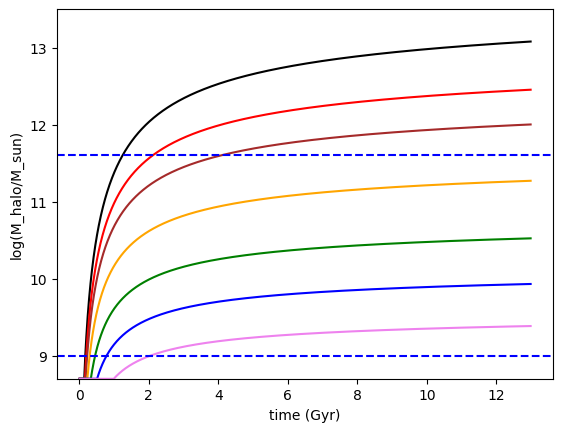

In [21]:
t_form_plot = [0.15, 0.17, 0.19, 0.24, 0.34, 0.52, 1.00]
col_plot= ['black', 'red', 'brown', 'orange', 'green', 'blue', 'violet']

#plt M_h, time evolution
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR =  evolve_galaxy(t_form= t_form_plot[i], t_obs=13, M_h_in= M_h_form)
    plt.plot(t, np.log10(np.where(M_h>0, M_h, 1.0)), color = col_plot[i])
plt. axhline(y=np.log10(M_h_min), color = 'b', linestyle= '--')
plt. axhline(y=np.log10(M_h_max), color = 'b', linestyle= '--')
plt.ylim(8.7, 13.5)
plt.xlabel('time (Gyr)')
plt.ylabel('log(M_halo/M_sun)')
plt.show()
